# Making sense of data through  advance visualization

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.tools.rplot as rplot

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The rplot trellis plotting interface is deprecated and will be removed in a future version. We refer to external packages like seaborn for similar but more refined functionality. 

See our docs http://pandas.pydata.org/pandas-docs/stable/visualization.html#rplot for some example how to convert your existing code to these packages.


## 차트의 라인 속성 제어

간단한 라인 차트를 만들어보자

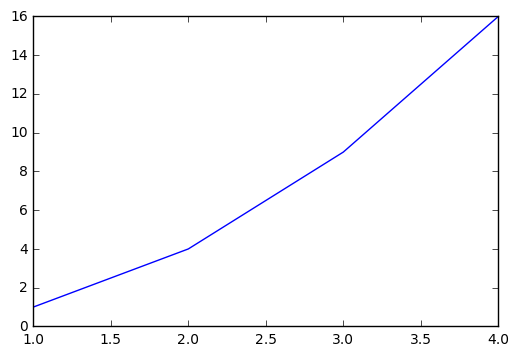

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

라인의 두께를 설정하자.

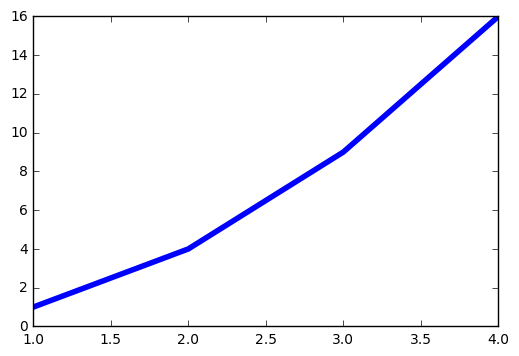

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], linewidth=4.0)
plt.show()

점선으로 선스타일 변경하기

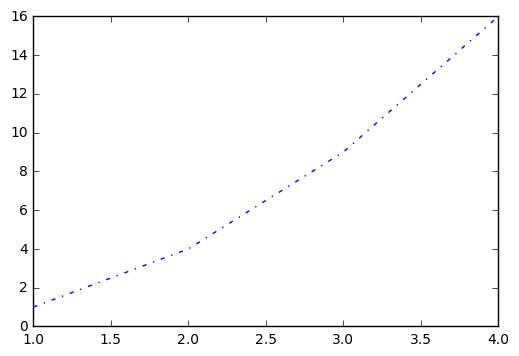

In [4]:
line, = plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
line.set_linestyle('-.')  
plt.show()


선 색깔 설정하기

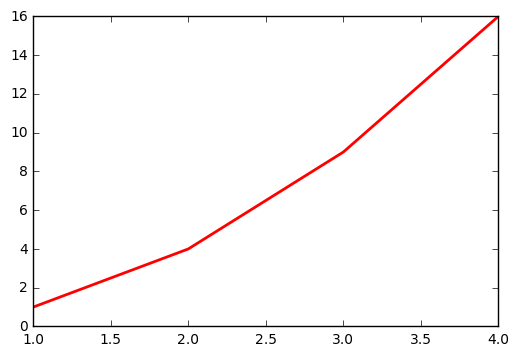

In [5]:
line, = plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.setp(line, color='r', linewidth=2.0)  
plt.show()

## Creatings multiple plots(여러개 플롯 생성하기)

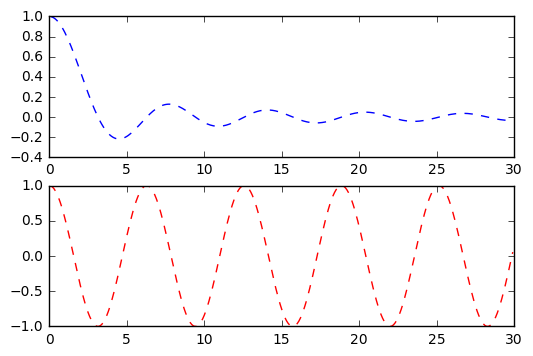

In [6]:
p1 = np.arange(0.0, 30.0, 0.1)

plt.subplot(211)
plt.plot(p1, np.sin(p1)/p1, 'b--')

plt.subplot(212)
plt.plot(p1, np.cos(p1), 'r--')
plt.show()

## Playing with text(플롯에 텍스트 넣기)

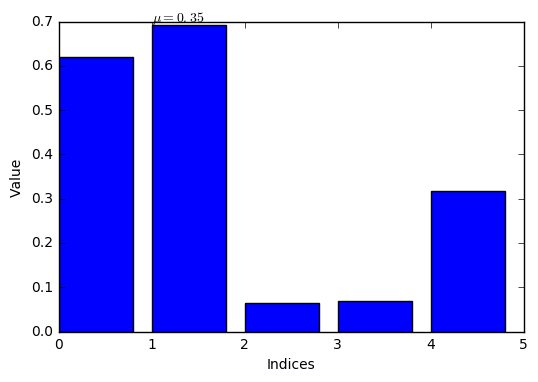

In [7]:
n = np.random.random_sample((5,))

plt.bar(np.arange(len(n)), n)
plt.xlabel('Indices')
plt.ylabel('Value')
plt.text(1, .7, r'$\mu=' + str(np.round(np.mean(n), 2)) + ' $')

plt.show()

Annotating the text(지정한 위치에 텍스트 넣기)

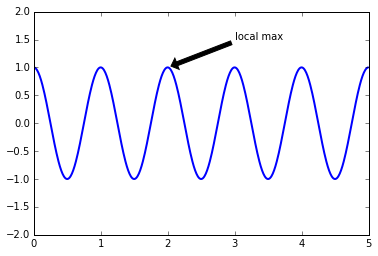

In [3]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

## Styling your plots(차트 스타일)

Creating a simple line chart with the ggplot style(ggplot 스타일)

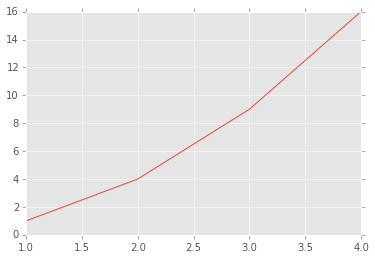

In [5]:
plt.style.use('ggplot')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Using the fivethirtyeight.com style

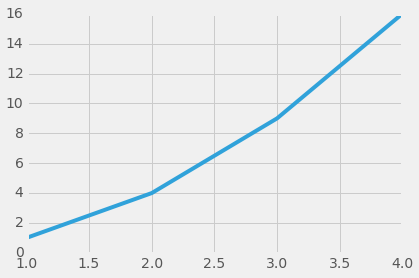

In [7]:
plt.style.use('fivethirtyeight')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Temporary styling(그라운드 스타일)

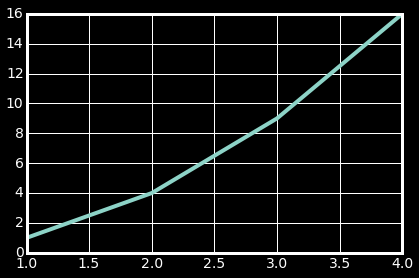

In [8]:
with plt.style.context(('dark_background')):
     plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

## Box plots

Lets add some data and plot the box plot

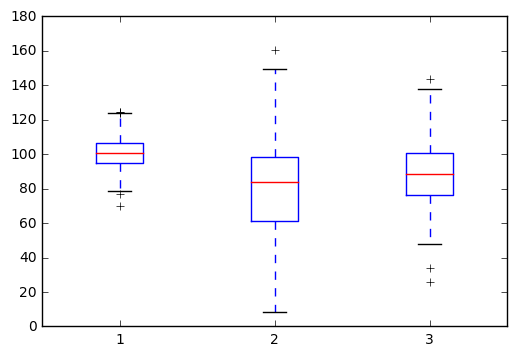

In [10]:
## 몇개의 데이터를 생성
np.random.seed(10)
box_data_1 = np.random.normal(100, 10, 200)
box_data_2 = np.random.normal(80, 30, 200)
box_data_3 = np.random.normal(90, 20, 200)

## 다른 데이터를 하나의 리스트로 합병
data_to_plot = [box_data_1, box_data_2, box_data_3]

# 박스 플롯 생성
bp = plt.boxplot(data_to_plot)

If you want to change the color of the boxes and customize the whiskers. It can be done using the following code

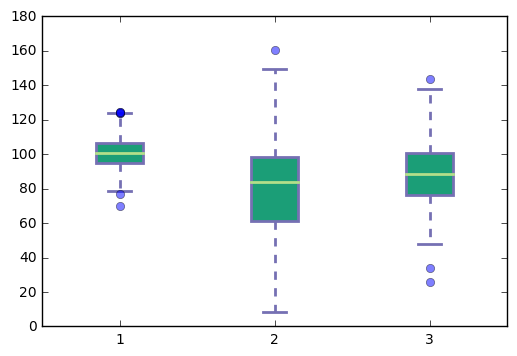

In [22]:
## patch_artist는 커스터마이징하기위한 옵션
bp = plt.boxplot(data_to_plot, patch_artist=True)

## 바깥라인 색깔 및 굵기 설정 과 내부 색칠 설정
for box in bp['boxes']:
    # 박스의 바깥라인 색깔과 굵기 설정
    box.set( color='#7570b3', linewidth=2)
    # 박스 내부의 색깔 설정
    box.set( facecolor = '#1b9e77' )

## whisker의 모양 변경
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## MinMax값의 속성 변경
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## 중앙 값의 색과 굻기 변경
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## 맨위의 점 모양, 색깔, 크기 변경
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## Heat Maps

메트릭스의 개별적인 값들을 색상의 차이로 표현하는 그래프이다.
패턴을 찾기 용이하다.

In [23]:
# 데이터 생성
data = np.random.rand(10,6)
rows = list('ZYXWVUTSRQ')
columns = list('ABCDEF')

We'll use the pcolor() which is similar to heatmaps.2() in R

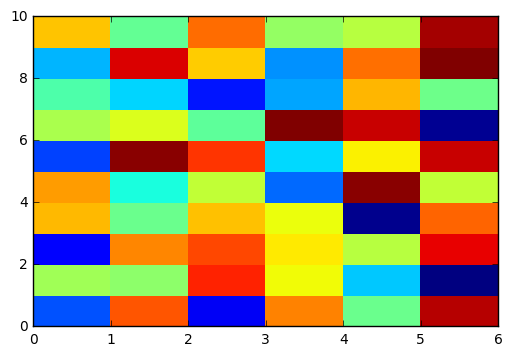

In [24]:
plt.pcolor(data)
plt.show()

We'll add the row and column labels to the heat map

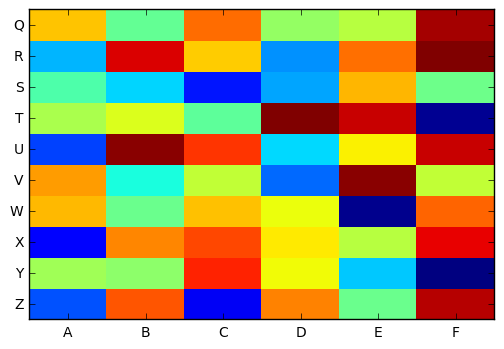

In [25]:
# 가로 세로축의 라벨링을 하는데 간격을 조절함
plt.pcolor(data)
plt.xticks(np.arange(0,6)+0.5,columns)
plt.yticks(np.arange(0,10)+0.5,rows)
plt.show()
plt.close()

히트맵의 색깔을 변경

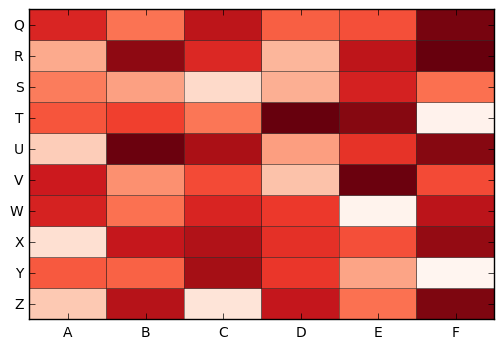

In [26]:
# Change color map
plt.pcolor(data,cmap=plt.cm.Reds,edgecolors='k')
plt.xticks(np.arange(0,6)+0.5,columns)
plt.yticks(np.arange(0,10)+0.5,rows)
plt.show()

Now, if you have a large amount of values that needs to be visualized using the heatmap. We can bin it and then visualize it using the following code
많은 수의 값에 대해 히트맵으로 시각화가 필요할때, binning 할 수 있다. 
histogram2d는 2차원 데이터에 대해 히스토그램을 구해주는 함수이다.

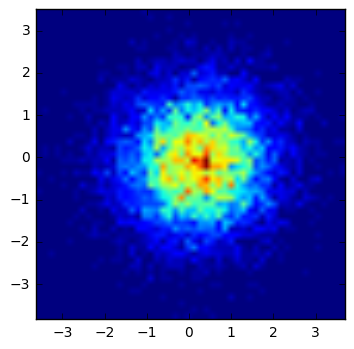

In [27]:
    # Generate some test data
    x = np.random.randn(8873)
    y = np.random.randn(8873)
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    plt.clf()
    plt.imshow(heatmap, extent=extent)
    plt.show()

# Scatter plot with Histogram(산점도와 히스토그램)

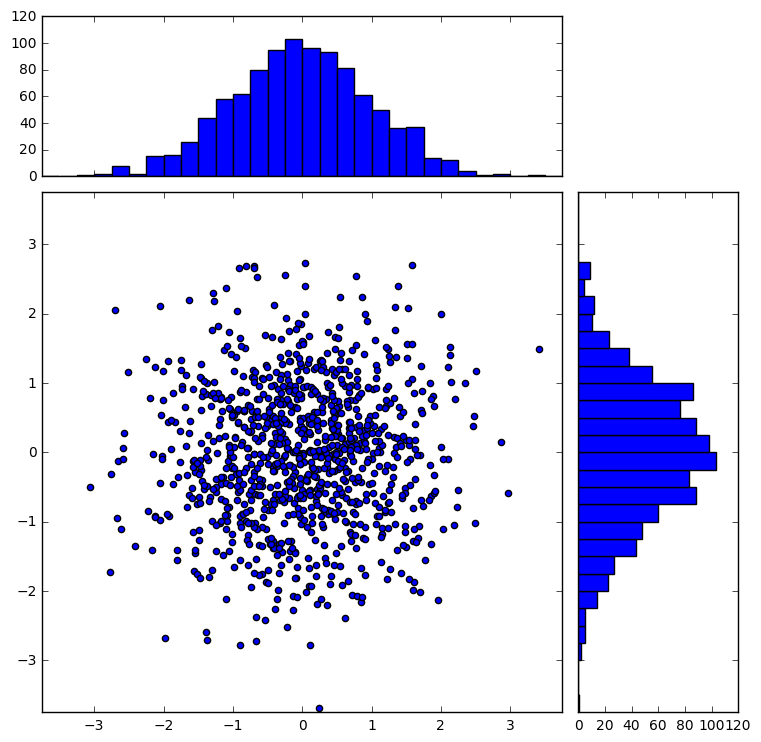

In [28]:
from matplotlib.ticker import NullFormatter

x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt   = NullFormatter() #라벨 없음

# 축 정의
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# 패널 사이즈 지정
plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# 라벨 없음
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# 스캐터 플롯 설정
axScatter.scatter(x, y)

# 그래프의 x와 y의 간격 설정
binwidth = 0.25
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
lim = ( int(xymax/binwidth) + 1) * binwidth


axScatter.set_xlim( (-lim, lim) )
axScatter.set_ylim( (-lim, lim) )

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.show()

## A Scatter Plot Matrix

The following is an example of a scatter plot matrix 

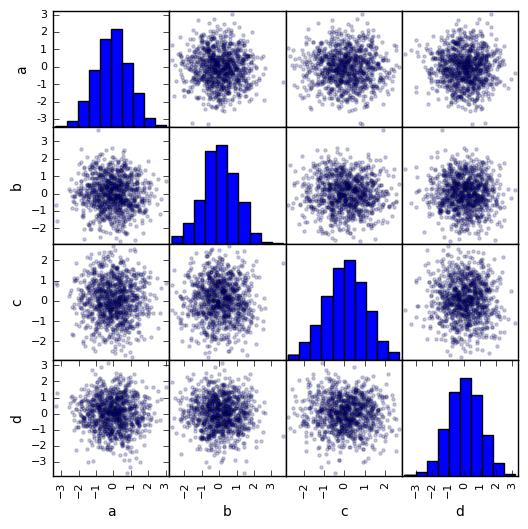

In [32]:

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

spm = pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')

Creating the scatter plot with the Kernal Density Estimation

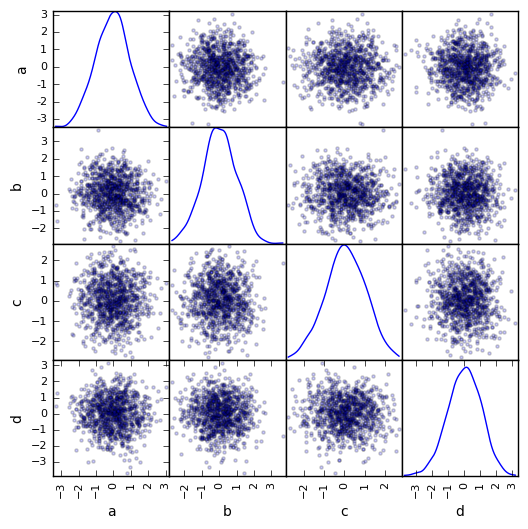

In [33]:
spm = pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

## Area Plot

Area Plot은 각 데이터가 차지하는 정도를 보여준다.

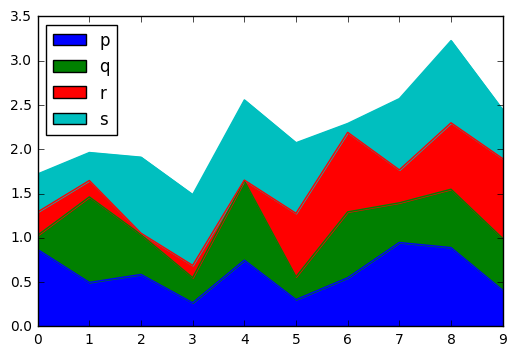

In [35]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['p', 'q', 'r', 's'])

df.plot(kind='area');

To create an unstacked Area plot stack을 누적옵션을 False로 바꾸면 쌓이지를 않음

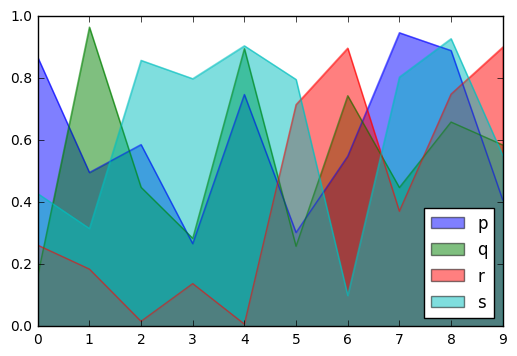

In [36]:
df.plot(kind='area', stacked=False);

# Bubble Chart
버블 차트는 산점도에 추가적인 차원이 주어지는데 그건은 크기이다.

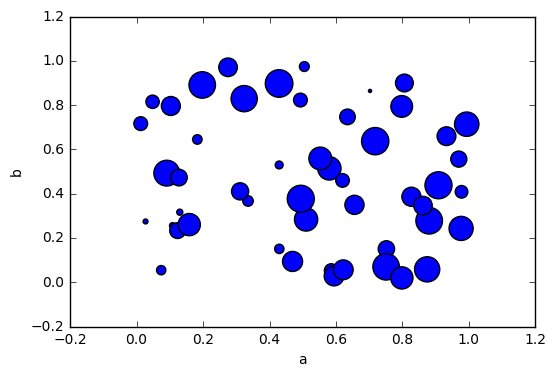

In [37]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='scatter', x='a', y='b', s=df['c']*400);

## Hexagon Bin Plot

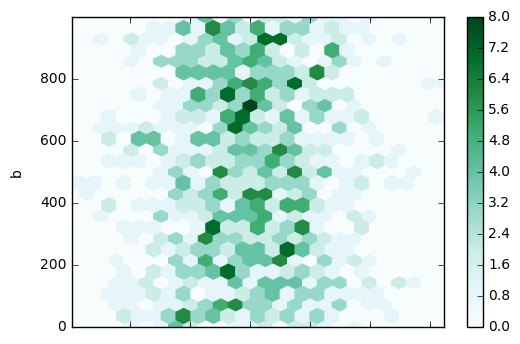

In [38]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df['b'] = df['b'] + np.arange(1000)

df.plot(kind='hexbin', x='a', y='b', gridsize=25)

## Trellis Plots
일정한 크기의 작은 여러개의 차트를 표현하는 플롯이다.

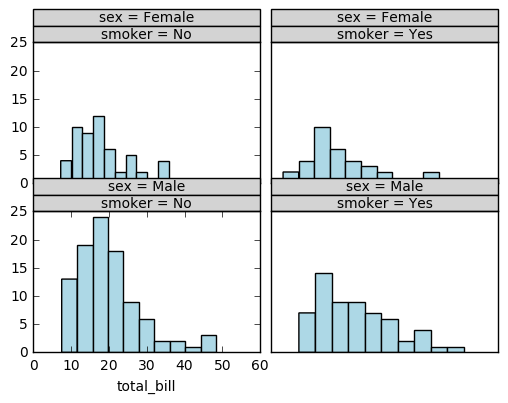

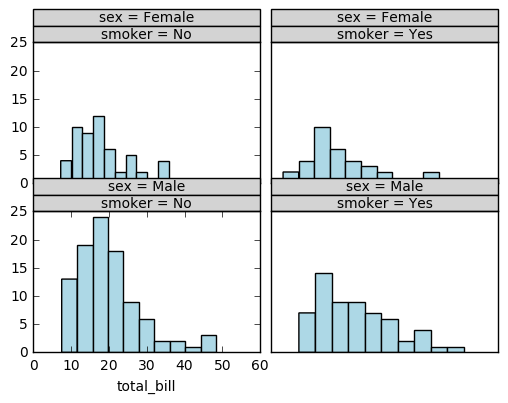

In [44]:
tips_data = pd.read_csv('./tips.csv')

plt.figure()

plot = rplot.RPlot(tips_data, x='total_bill', y='tip')

plot.add(rplot.TrellisGrid(['sex', 'smoker']))

plot.add(rplot.GeomHistogram())

plot.render(plt.gcf())

우리는 Kernal Density Estimate로 다시 플롯을 그려볼 수 있다.

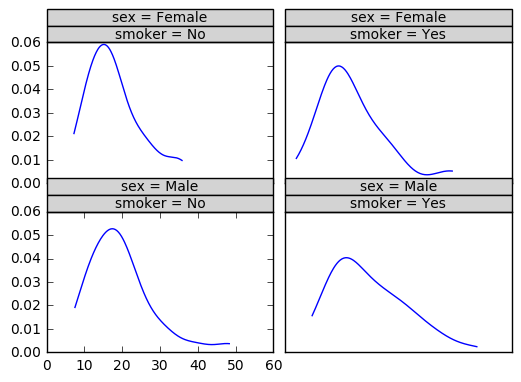

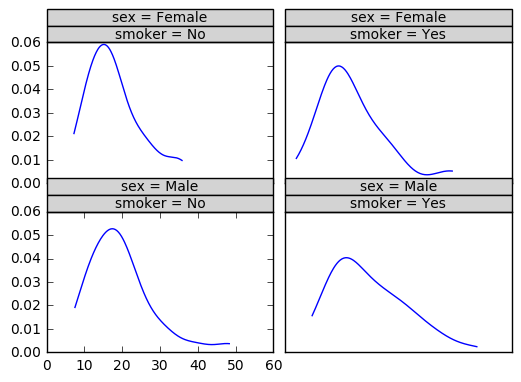

In [46]:
plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomDensity())
plot.render(plt.gcf())

Trellis plot with scatter and poly fit line

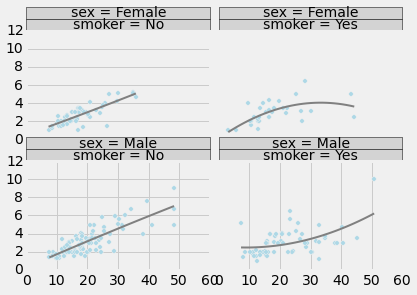

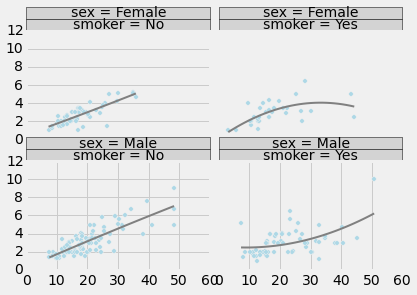

In [8]:
plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomScatter())
plot.add(rplot.GeomPolyFit(degree=2))
plot.render(plt.gcf())

Trellis Chart with 2D kernal density plot 

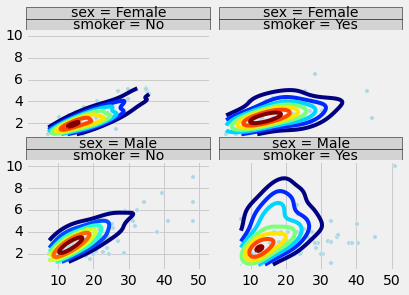

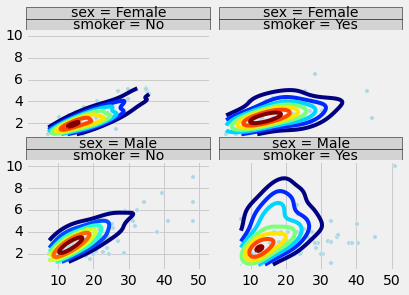

In [9]:
plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomScatter())
plot.add(rplot.GeomDensity2D())
plot.render(plt.gcf())

## 3D Plot of a Surface

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

Let's adjust the view using the view_int. The following is the view at 0 elevation and 0 degree angle.

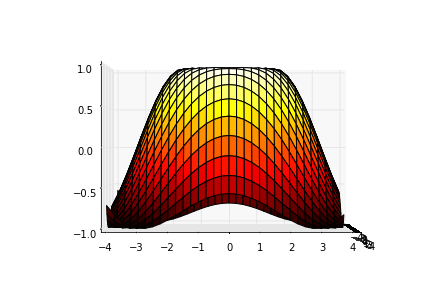

In [53]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=0., azim=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

The following is the view at 50 elevation.

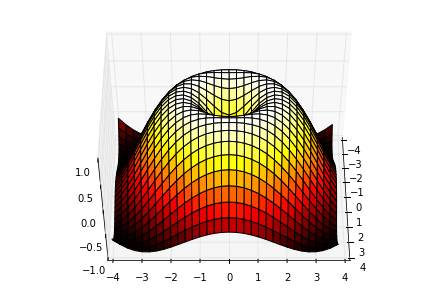

In [55]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=50., azim=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

The following is the view at 50 elevation and 30 degrees angle.

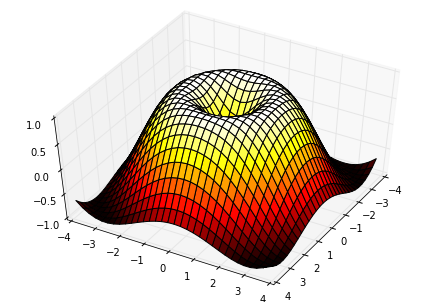

In [56]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=50., azim=30)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')